In [278]:
#Importing libraries and our csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
data = pd.read_csv(r"C:\Users\HP\Downloads\train.csv")

In [279]:
#Visualizing our dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [280]:
#Checking the shape of our dataset
data.shape

(891, 12)

In [281]:
#Checking for duplicated values in our dataset
data.duplicated().sum()

0

In [282]:
#Checking the size of our dataset
data.size

10692

In [283]:
#Checking the datatypes of the columns in our dataset
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [284]:
#Checking for null or empty values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [285]:
#We fill our empty values using forward fill
data['Age'] = data['Age'].fillna(method = 'ffill')
data['Embarked'] = data['Embarked'].fillna(method = 'ffill')

In [286]:
data['Cabin'] = data['Cabin'].fillna(method = 'ffill')

In [287]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [288]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [289]:
#To remove unwanted colums, we first store the columns we want to delete to a variable 
x=['PassengerId','Name','Ticket','Cabin']
x

['PassengerId', 'Name', 'Ticket', 'Cabin']

In [290]:
#We then delete unwanted columns using df.drop()
data.drop(x, axis=1, inplace= True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [291]:
#We want to move the target column(Survived) to be the last column in the df
#We first convert the dataframe to a list and assign it to a different variable, i will name it 'Survival'

Survival = list(data)
Survival

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [292]:
#We then swap the index position of the target column('Survived') with that of the last column('Embarked') 
Survival[0],Survival[7]= Survival[7],Survival[0]

In [293]:
Survival

['Embarked', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']

In [294]:
#We then convert the survival list and assign it back to our dataframe('data') 
data = data[Survival]
data.head()

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,S,3,male,22.0,1,0,7.2500,0
1,C,1,female,38.0,1,0,71.2833,1
2,S,3,female,26.0,0,0,7.9250,1
3,S,1,female,35.0,1,0,53.1000,1
4,S,3,male,35.0,0,0,8.0500,0


In [295]:
#Our data is now cleaned and ready for exploration

# Exploratory Data Analysis

In [296]:
data.head()

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,S,3,male,22.0,1,0,7.2500,0
1,C,1,female,38.0,1,0,71.2833,1
2,S,3,female,26.0,0,0,7.9250,1
3,S,1,female,35.0,1,0,53.1000,1
4,S,3,male,35.0,0,0,8.0500,0


1. To find out the total number of people who survived

In [297]:
data.Survived.value_counts()      

Survived
0    549
1    342
Name: count, dtype: int64

Text(0, 0.5, 'Survival Status')

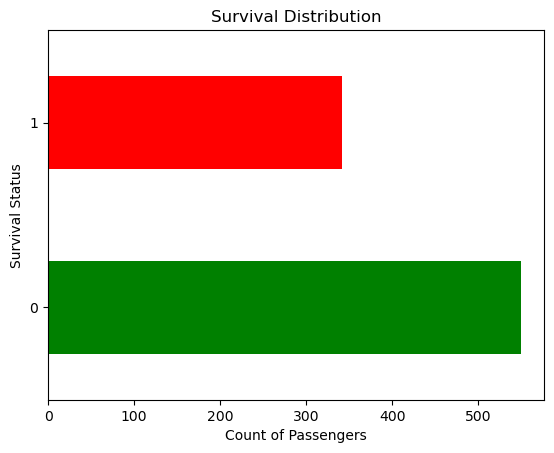

In [298]:
#This means 549 people did not survive and 342 people survived
data.Survived.value_counts().plot(kind = 'barh', color = ['green','red'])
plt.title('Survival Distribution', color = 'black')
plt.xlabel('Count of Passengers', color = 'black')
plt.ylabel('Survival Status', color = 'black')

To find the total number of men and women who survived or did not survive

In [299]:
data.groupby(['Sex','Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

Text(0, 0.5, 'Count of Passengers')

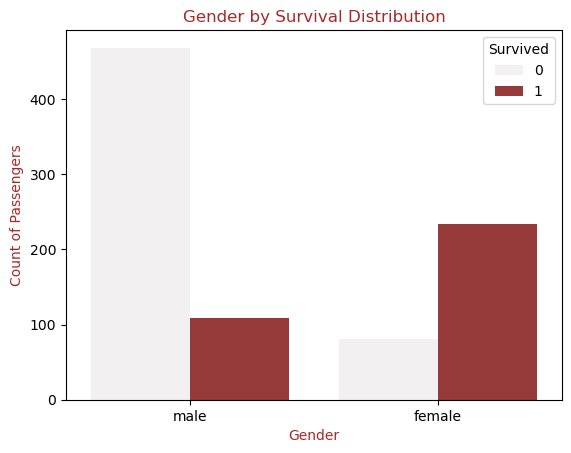

In [300]:
#This means 81 females and 468 males did not survive while 233 females and 109 males survived
sns.countplot(x='Sex', hue = 'Survived', color ='brown', data = data)
plt.title('Gender by Survival Distribution', color = 'brown')
plt.xlabel('Gender', color = 'brown')
plt.ylabel('Count of Passengers', color = 'brown')

3. To find the number of males and females who embarked from the different exit points

Text(0, 0.5, 'Count of Passenger')

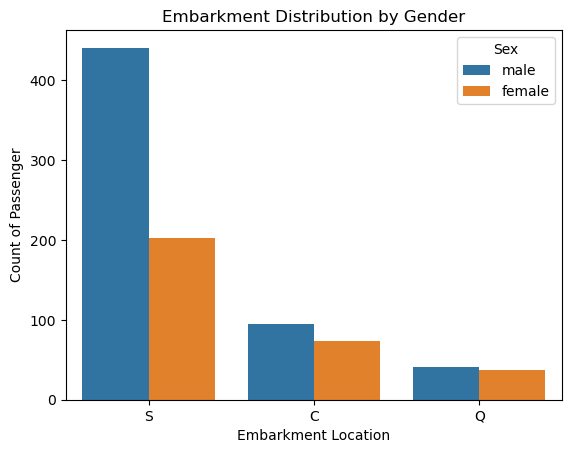

In [301]:
sns.countplot(x='Embarked', hue = 'Sex', data=data)
plt.title('Embarkment Distribution by Gender', color = 'black')
plt.xlabel('Embarkment Location', color = 'black')
plt.ylabel('Count of Passenger', color = 'black')

4. To find the number of people in the various passenger classes

In [302]:
data.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [303]:
data.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Text(0, 0.5, 'Passenger Class')

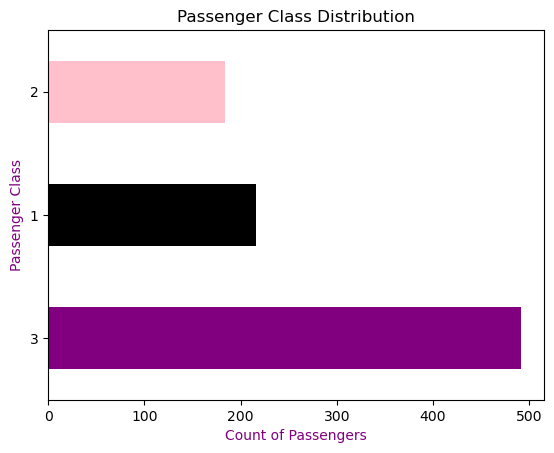

In [304]:
#This means there were 491 passengers in class 3, 216 passengers in class 2, and 184 passengers in class 1
data.Pclass.value_counts().plot(kind = 'barh', color = ['purple','black','pink'])
plt.title('Passenger Class Distribution', color = 'black')
plt.xlabel('Count of Passengers', color = 'purple')
plt.ylabel('Passenger Class', color = 'purple')

5. To find the number of males and females in the various passenger class

In [305]:
data.groupby(['Pclass','Sex']). size().reset_index()

,Pclass,Sex,0
0,1,female,94
1,1,male,122
2,2,female,76
3,2,male,108
4,3,female,144
5,3,male,347


Text(0, 0.5, 'Count of Passengers')

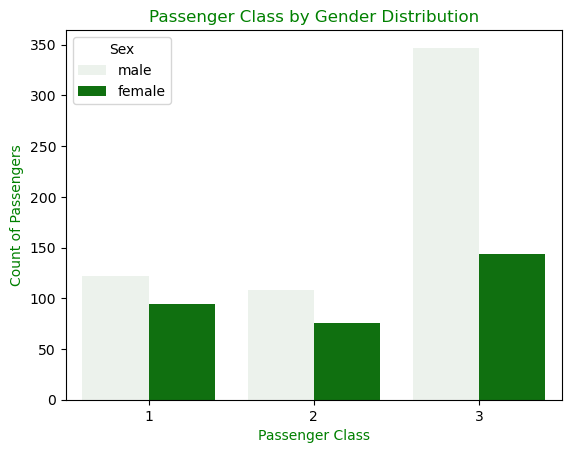

In [306]:
#This tells us that there are :
#94 females and 122 males in Class 1, 76 females and 108 males in class 2, 144 females and 347 males in class 3
sns.countplot(x='Pclass', hue = 'Sex', color = 'green', data= data)
plt.title('Passenger Class by Gender Distribution', color = 'Green')
plt.xlabel('Passenger Class', color = 'green')
plt.ylabel('Count of Passengers', color = 'green')

6. To find the number of passengers from each point of Embarkment

In [307]:
data.Embarked.value_counts()        #This shows us there are 3 points of embarkment

Embarked
S    644
C    169
Q     78
Name: count, dtype: int64

Text(0, 0.5, 'Count of Passengers')

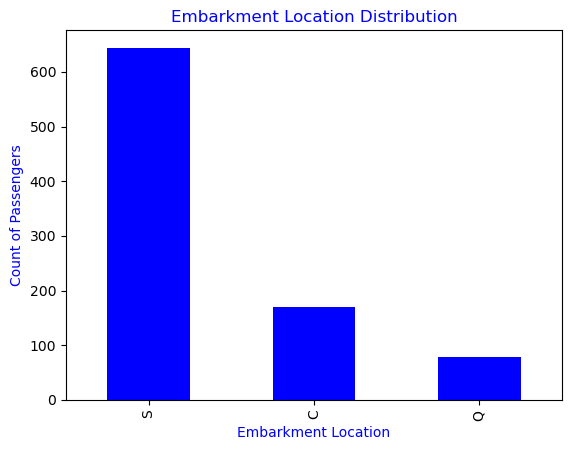

In [308]:
data.Embarked.value_counts().plot(kind = 'bar', color='blue')
plt.title('Embarkment Location Distribution', color = 'blue')
plt.xlabel('Embarkment Location', color = 'blue')
plt.ylabel('Count of Passengers', color = 'blue')

7. To find the number of passengers from each point of Embarkment who survived and who didn't survive

In [309]:
 data.groupby(['Embarked','Survived']).size().reset_index()

,Embarked,Survived,0
0,C,0,75
1,C,1,94
2,Q,0,47
3,Q,1,31
4,S,0,427
5,S,1,217


Text(0, 0.5, 'Count of Passengers')

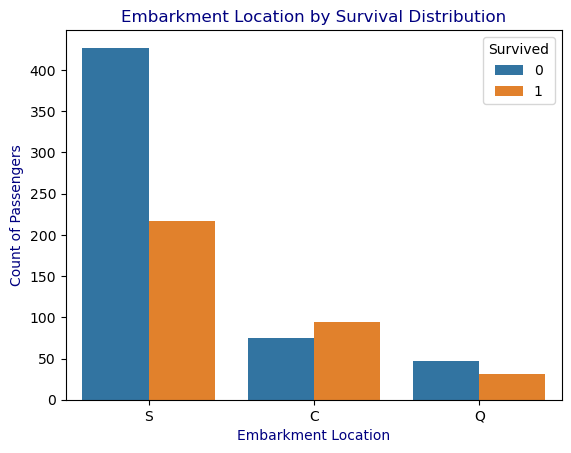

In [310]:
#This distribution below shows that:
#from point C, 94 people survived and 75 people did not
#From point Q, 31 people survived and 47 people did not
#From point S, 217 people survived and 427 people did not
sns.countplot(x ='Embarked',hue = 'Survived', data = data)
plt.title('Embarkment Location by Survival Distribution', color = 'navy')
plt.xlabel('Embarkment Location', color = 'navy')
plt.ylabel('Count of Passengers', color = 'navy')

Visualizing the Dataset Using A Scatterplot

In [311]:
data.head()

,Embarked,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,S,3,male,22.0,1,0,7.2500,0
1,C,1,female,38.0,1,0,71.2833,1
2,S,3,female,26.0,0,0,7.9250,1
3,S,1,female,35.0,1,0,53.1000,1
4,S,3,male,35.0,0,0,8.0500,0


In [312]:
#To encode the Embarked column using dummy variable encoding
o = pd.get_dummies(data.Embarked, dtype=int)
data = pd.concat([data,o], axis = 1) 

In [313]:
#dropping the Embarkeed column
data.drop('Embarked', axis = 1, inplace = True)

In [314]:
#To encode the Sex column using dummy variable encoding
z= pd.get_dummies(data.Sex, dtype=int)
data = pd.concat([data,z], axis = 1) 

In [315]:
#delete the Sex column
data.drop('Sex', axis = 1, inplace = True)

In [316]:
data.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,C,Q,S,female,male
0,3,22.0,1,0,7.2500,0,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,1,0,0,1,0
2,3,26.0,0,0,7.9250,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,1,1,0
4,3,35.0,0,0,8.0500,0,0,0,1,0,1


In [317]:
data.corr().round(2)

,Pclass,Age,SibSp,Parch,Fare,Survived,C,Q,S,female,male
Pclass,1.00,-0.29,0.08,0.02,-0.55,-0.34,-0.25,0.21,0.08,-0.13,0.13
Age,-0.29,1.00,-0.21,-0.17,0.08,-0.07,0.01,0.03,-0.03,-0.06,0.06
SibSp,0.08,-0.21,1.00,0.41,0.16,-0.04,-0.06,-0.03,0.07,0.11,-0.11
Parch,0.02,-0.17,0.41,1.00,0.22,0.08,-0.01,-0.08,0.06,0.25,-0.25
Fare,-0.55,0.08,0.16,0.22,1.00,0.26,0.27,-0.11,-0.17,0.18,-0.18
Survived,-0.34,-0.07,-0.04,0.08,0.26,1.00,0.17,0.01,-0.16,0.54,-0.54
C,-0.25,0.01,-0.06,-0.01,0.27,0.17,1.00,-0.15,-0.78,0.09,-0.09
Q,0.21,0.03,-0.03,-0.08,-0.11,0.01,-0.15,1.00,-0.50,0.08,-0.08
S,0.08,-0.03,0.07,0.06,-0.17,-0.16,-0.78,-0.50,1.00,-0.13,0.13
female,-0.13,-0.06,0.11,0.25,0.18,0.54,0.09,0.08,-0.13,1.00,-1.00


<Axes: >

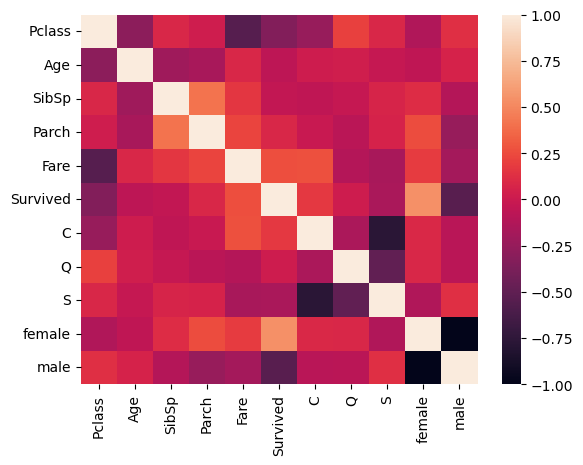

In [318]:
sns.heatmap(data.corr().round(2))

In [319]:
data.corr()['Survived'].abs()

Pclass      0.338481
Age         0.065571
SibSp       0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
C           0.171485
Q           0.008660
S           0.155660
female      0.543351
male        0.543351
Name: Survived, dtype: float64

In [320]:
#Setting our threshold to 0.2
threshold = 0.2
selected_data = data.corr()['Survived'].abs()[data.corr()['Survived'].abs() >= threshold]
selected_data

Pclass      0.338481
Fare        0.257307
Survived    1.000000
female      0.543351
male        0.543351
Name: Survived, dtype: float64

In [321]:
unselected_data = data.corr()['Survived'].abs()[data.corr()['Survived'].abs() < threshold]
unselected_data

Age      0.065571
SibSp    0.035322
Parch    0.081629
C        0.171485
Q        0.008660
S        0.155660
Name: Survived, dtype: float64

In [322]:
(selected_data).index

Index(['Pclass', 'Fare', 'Survived', 'female', 'male'], dtype='object')

In [323]:
pd.DataFrame(selected_data)

,Survived
Pclass,0.338481
Fare,0.257307
Survived,1.000000
female,0.543351
male,0.543351


In [324]:
#extract the selected columns
selected = ['Pclass', 'Fare', 'Survived', 'female', 'male']

In [325]:
#Assign them back to our dataframe 'data'
data = data[selected]
data.head()

,Pclass,Fare,Survived,female,male
0,3,7.2500,0,0,1
1,1,71.2833,1,1,0
2,3,7.9250,1,1,0
3,1,53.1000,1,1,0
4,3,8.0500,0,0,1


# Splitting the Dataset

In [326]:
x= data.drop('Survived', axis = 1)

In [328]:
x.head(3)

,Pclass,Fare,female,male
0,3,7.2500,0,1
1,1,71.2833,1,0
2,3,7.9250,1,0


In [329]:
y = data.Survived
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [330]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7, shuffle = True, random_state = 50)

In [331]:
#To verify the shape of our training and test sets
print(f'The shape of x_train is: {x_train.shape}')
print(f'The shape of x_test is: {x_test.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (623, 4)
The shape of x_test is: (268, 4)
The shape of y_train is: (623,)
The shape of y_test is: (268,)


In [332]:
#Importing all algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [333]:
nb = GaussianNB()
knn = KNeighborsClassifier()
scm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

# Training Scores Using the Various Algorithm

In [334]:
#Naive Bayes
nb.fit(x_train,y_train)
print(f'The accuracy score of the training set is {nb.score(x_train,y_train).round(2)*100}')

The accuracy score of the training set is 78.0


In [335]:
#KNearest Neigbors
knn.fit(x_train,y_train)
print(f'The accuracy score of the training set is {knn.score(x_train,y_train).round(2)*100}')

The accuracy score of the training set is 82.0


In [336]:
#Support Vector Machine
scm.fit(x_train,y_train)
print(f'The accuracy score of the training set is {scm.score(x_train,y_train).round(2)*100}')

The accuracy score of the training set is 68.0


In [337]:
#Decision Tree
dt.fit(x_train,y_train)
print(f'The accuracy score of the training set is {dt.score(x_train,y_train).round(2)*100}')

The accuracy score of the training set is 91.0


In [338]:
#Random Forest
rf.fit(x_train,y_train)
print(f'The accuracy score of the training set is {rf.score(x_train,y_train).round(2)*100}')

The accuracy score of the training set is 91.0


# Test Scores and Confusion Matrix Using the Various Algorithms

In [340]:
#import the neccessary libraries
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

The accuracy score is 79.0
[[136  26]
 [ 30  76]]


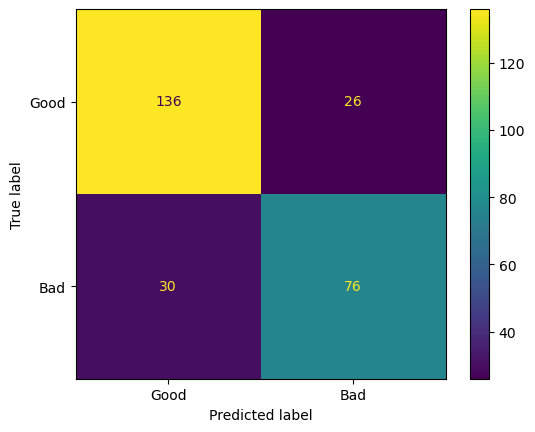

In [341]:
#Naive-Bayes
nb.predict(x_test)
print(f'The accuracy score is {accuracy_score(y_test, nb.predict(x_test)).round(2)*100}')
print(confusion_matrix(y_test, nb.predict(x_test)))
#visualizing better using ConfusionMatrixDisplay
label = ['Good','Bad']
ConfusionMatrixDisplay(confusion_matrix(y_test, nb.predict(x_test)), display_labels = label).plot()

The accuracy score is 80.0
[[141  21]
 [ 33  73]]


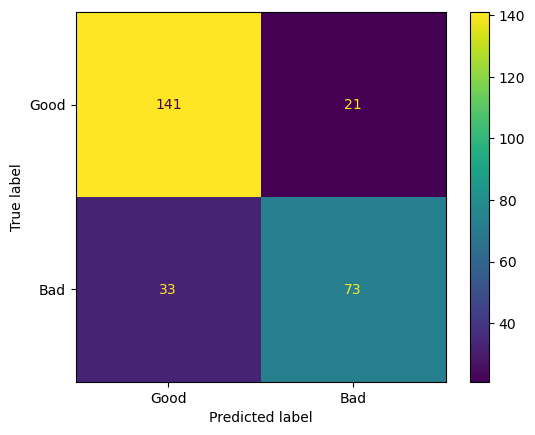

In [342]:
#KNearest Neighbor
knn.predict(x_test)
print(f'The accuracy score is {accuracy_score(y_test, knn.predict(x_test)).round(2)*100}')
print(confusion_matrix(y_test, knn.predict(x_test)))
label = ['Good','Bad']
ConfusionMatrixDisplay(confusion_matrix(y_test, knn.predict(x_test)), display_labels = label).plot()

The accuracy score is 64.0
[[153   9]
 [ 87  19]]


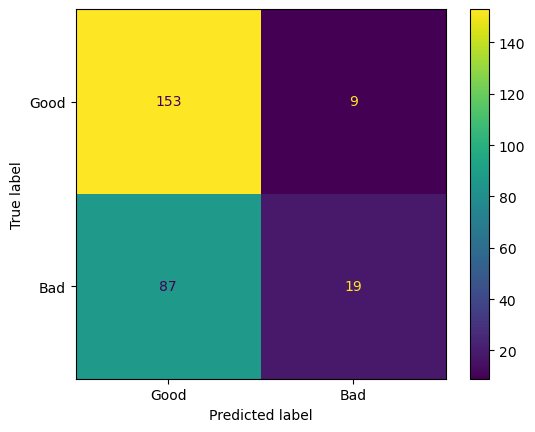

In [343]:
#Support Vector Machine
scm.predict(x_test)
print(f'The accuracy score is {accuracy_score(y_test, scm.predict(x_test)).round(2)*100}')
print(confusion_matrix(y_test, scm.predict(x_test)))
label = ['Good','Bad']
ConfusionMatrixDisplay(confusion_matrix(y_test, scm.predict(x_test)), display_labels = label).plot()

The accuracy score is 81.0
[[147  15]
 [ 36  70]]


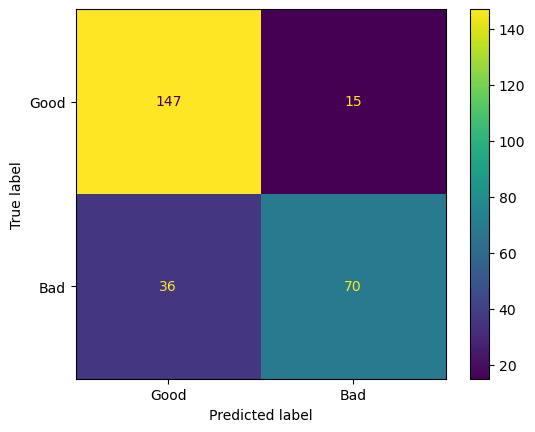

In [344]:
#Decision Tree
dt.predict(x_test)
print(f'The accuracy score is {accuracy_score(y_test, dt.predict(x_test)).round(2)*100}')
print(confusion_matrix(y_test, dt.predict(x_test)))
label = ['Good','Bad']
ConfusionMatrixDisplay(confusion_matrix(y_test, dt.predict(x_test)), display_labels = label).plot()

The accuracy score is 82.0
[[148  14]
 [ 35  71]]


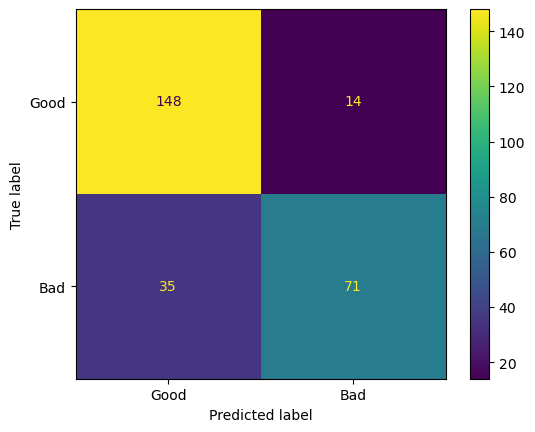

In [345]:
#Random Forest
rf.predict(x_test)
print(f'The accuracy score is {accuracy_score(y_test, rf.predict(x_test)).round(2)*100}')
print(confusion_matrix(y_test, rf.predict(x_test)))
label = ['Good','Bad']
ConfusionMatrixDisplay(confusion_matrix(y_test, rf.predict(x_test)), display_labels = label).plot()